In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report

import pickle

In [2]:
df = pd.read_csv('/content/transaction_dataset.csv', index_col=0)
df.tail()
descriptive_stats = df.describe(include='all').transpose()

# Display the descriptive statistics table
descriptive_stats

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Index,9841.0,NaN,NaN,NaN,1815.049893,1222.62183,1.0,821.0,1641.0,2601.0,4729.0
Address,9841,9816,0x4cd526aa2db72eb1fd557b37c6b0394acd35b212,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG,9841.0,NaN,NaN,NaN,0.221421,0.415224,0.0,0.0,0.0,0.0,1.0
Avg min between sent tnx,9841.0,NaN,NaN,NaN,5086.878721,21486.549974,0.0,0.0,17.34,565.47,430287.67
Avg min between received tnx,9841.0,NaN,NaN,NaN,8004.851184,23081.714801,0.0,0.0,509.77,5480.39,482175.49
Time Diff between first and last (Mins),9841.0,NaN,NaN,NaN,218333.257652,322937.92574,0.0,316.93,46637.03,304070.98,1954860.95
Sent tnx,9841.0,NaN,NaN,NaN,115.931714,757.226361,0.0,1.0,3.0,11.0,10000.0
Received Tnx,9841.0,NaN,NaN,NaN,163.700945,940.83655,0.0,1.0,4.0,27.0,10000.0
Number of Created Contracts,9841.0,NaN,NaN,NaN,3.729702,141.445583,0.0,0.0,0.0,0.0,9995.0
Unique Received From Addresses,9841.0,NaN,NaN,NaN,30.360939,298.621112,0.0,1.0,2.0,5.0,9999.0


In [3]:
df.shape

(9841, 50)

   Index                                     Address  FLAG  \
0      1  0x00009277775ac7d0d59eaad8fee3d10ac6c805e8     0   
1      2  0x0002b44ddb1476db43c868bd494422ee4c136fed     0   
2      3  0x0002bda54cb772d040f779e88eb453cac0daa244     0   
3      4  0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e     0   
4      5  0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89     0   

   Avg min between sent tnx  Avg min between received tnx  \
0                    844.26                       1093.71   
1                  12709.07                       2958.44   
2                 246194.54                       2434.02   
3                  10219.60                      15785.09   
4                     36.61                      10707.77   

   Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                704785.63       721            89   
1                               1218216.73        94             8   
2                                516729.30        

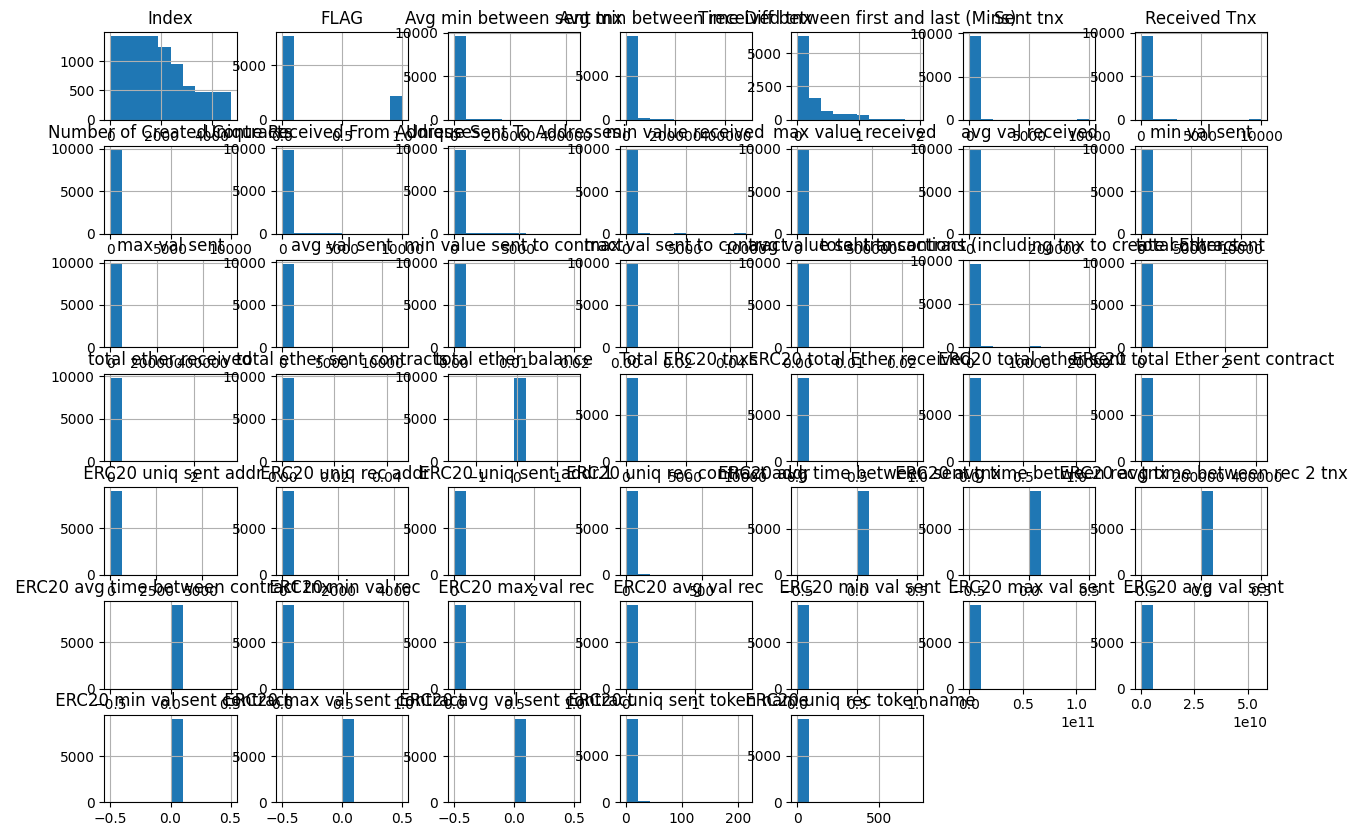

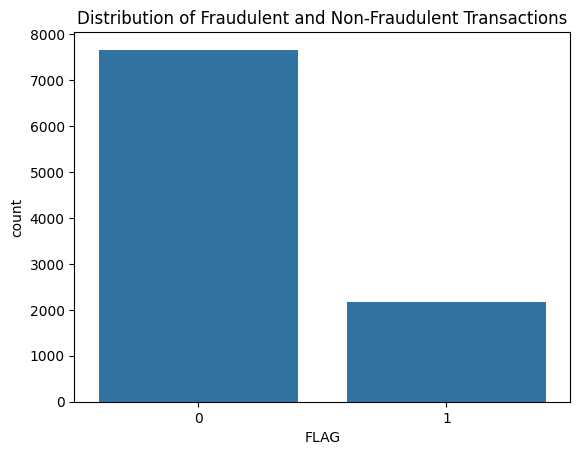

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Initial Data Exploration
print(df.head())
print(df.info())
print(df.describe())

# 2. Missing Values Analysis
print(df.isnull().sum())
# Percentage of missing values
print(df.isnull().mean() * 100)

# 3. Data Distribution Analysis
# Numerical features
df.select_dtypes(include=['number']).hist(figsize=(15, 10))
plt.show()

# 5. Target Variable Analysis
sns.countplot(x='FLAG', data=df)
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.show()



In [5]:
# drop first two columns (Index, Adress)
df = df.iloc[:,2:]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9841 entries, 0 to 9840
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841 non-

In [7]:
for col in df:print(f'{col} : {len(df[col].unique())}')

FLAG : 2
Avg min between sent tnx : 5013
Avg min between received tnx : 6223
Time Diff between first and last (Mins) : 7810
Sent tnx : 641
Received Tnx : 727
Number of Created Contracts : 20
Unique Received From Addresses : 256
Unique Sent To Addresses : 258
min value received : 4589
max value received  : 6302
avg val received : 6767
min val sent : 4719
max val sent : 6647
avg val sent : 5854
min value sent to contract : 3
max val sent to contract : 4
avg value sent to contract : 4
total transactions (including tnx to create contract : 897
total Ether sent : 5868
total ether received : 6728
total ether sent contracts : 4
total ether balance : 5717
 Total ERC20 tnxs : 301
 ERC20 total Ether received : 3461
 ERC20 total ether sent : 1416
 ERC20 total Ether sent contract : 30
 ERC20 uniq sent addr : 108
 ERC20 uniq rec addr : 148
 ERC20 uniq sent addr.1 : 5
 ERC20 uniq rec contract addr : 124
 ERC20 avg time between sent tnx : 2
 ERC20 avg time between rec tnx : 2
 ERC20 avg time between 

In [8]:
df.select_dtypes(include=['float','int']).describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In [9]:
df['FLAG'].value_counts()

FLAG
0    7662
1    2179
Name: count, dtype: int64

In [10]:
print(f'Percentage of non-fraudulent instances : {len(df.loc[df["FLAG"]==0])/len(df["FLAG"])*100}')
print(f'Percentage of fraudulent instances : {len(df.loc[df["FLAG"]==1])/len(df["FLAG"])*100}')

Percentage of non-fraudulent instances : 77.85794126613149
Percentage of fraudulent instances : 22.14205873386851


In [11]:
df.isnull().sum()

FLAG                                                       0
Avg min between sent tnx                                   0
Avg min between received tnx                               0
Time Diff between first and last (Mins)                    0
Sent tnx                                                   0
Received Tnx                                               0
Number of Created Contracts                                0
Unique Received From Addresses                             0
Unique Sent To Addresses                                   0
min value received                                         0
max value received                                         0
avg val received                                           0
min val sent                                               0
max val sent                                               0
avg val sent                                               0
min value sent to contract                                 0
max val sent to contract

In [12]:
# Turn object variables into 'category' datatype
categories = df.select_dtypes('O').columns.astype('category')
df[categories]

,ERC20 most sent token type,ERC20_most_rec_token_type
0,Cofoundit,Numeraire
1,Livepeer Token,Livepeer Token
2,NaN,XENON
3,Raiden,XENON
4,StatusNetwork,EOS
...,...,...
9836,,GSENetwork
9837,,Blockwell say NOTSAFU
9838,,Free BOB Tokens - BobsRepair.com
9839,NaN,NaN


In [13]:
# Drop the two categorical features
df.drop(df[categories], axis=1, inplace=True)

In [14]:
# Replace missings of numerical variables with median (median imputation)
df.fillna(df.median(), inplace=True)

In [15]:
df.isnull().sum()

FLAG                                                    0
Avg min between sent tnx                                0
Avg min between received tnx                            0
Time Diff between first and last (Mins)                 0
Sent tnx                                                0
Received Tnx                                            0
Number of Created Contracts                             0
Unique Received From Addresses                          0
Unique Sent To Addresses                                0
min value received                                      0
max value received                                      0
avg val received                                        0
min val sent                                            0
max val sent                                            0
avg val sent                                            0
min value sent to contract                              0
max val sent to contract                                0
avg value sent

In [16]:
# Filtering the features with 0 variance
no_var = df.var() == 0
df.var()[no_var]

 ERC20 avg time between sent tnx        0.0
 ERC20 avg time between rec tnx         0.0
 ERC20 avg time between rec 2 tnx       0.0
 ERC20 avg time between contract tnx    0.0
 ERC20 min val sent contract            0.0
 ERC20 max val sent contract            0.0
 ERC20 avg val sent contract            0.0
dtype: float64

In [17]:
# Drop features with no variance as these features will not change the performance of the model
df.drop(df.var()[no_var].index, axis = 1, inplace = True)
print(df.var())

FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                      1.062298e+05
max value received                                      1.692294e+08
avg val received                                        8.323238e+06
min val sent                                            1.921264e+04
max val sent                                            4.394646e+07
avg val sent                      

In [18]:
 df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9841 entries, 0 to 9840
Data columns (total 39 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841 non-

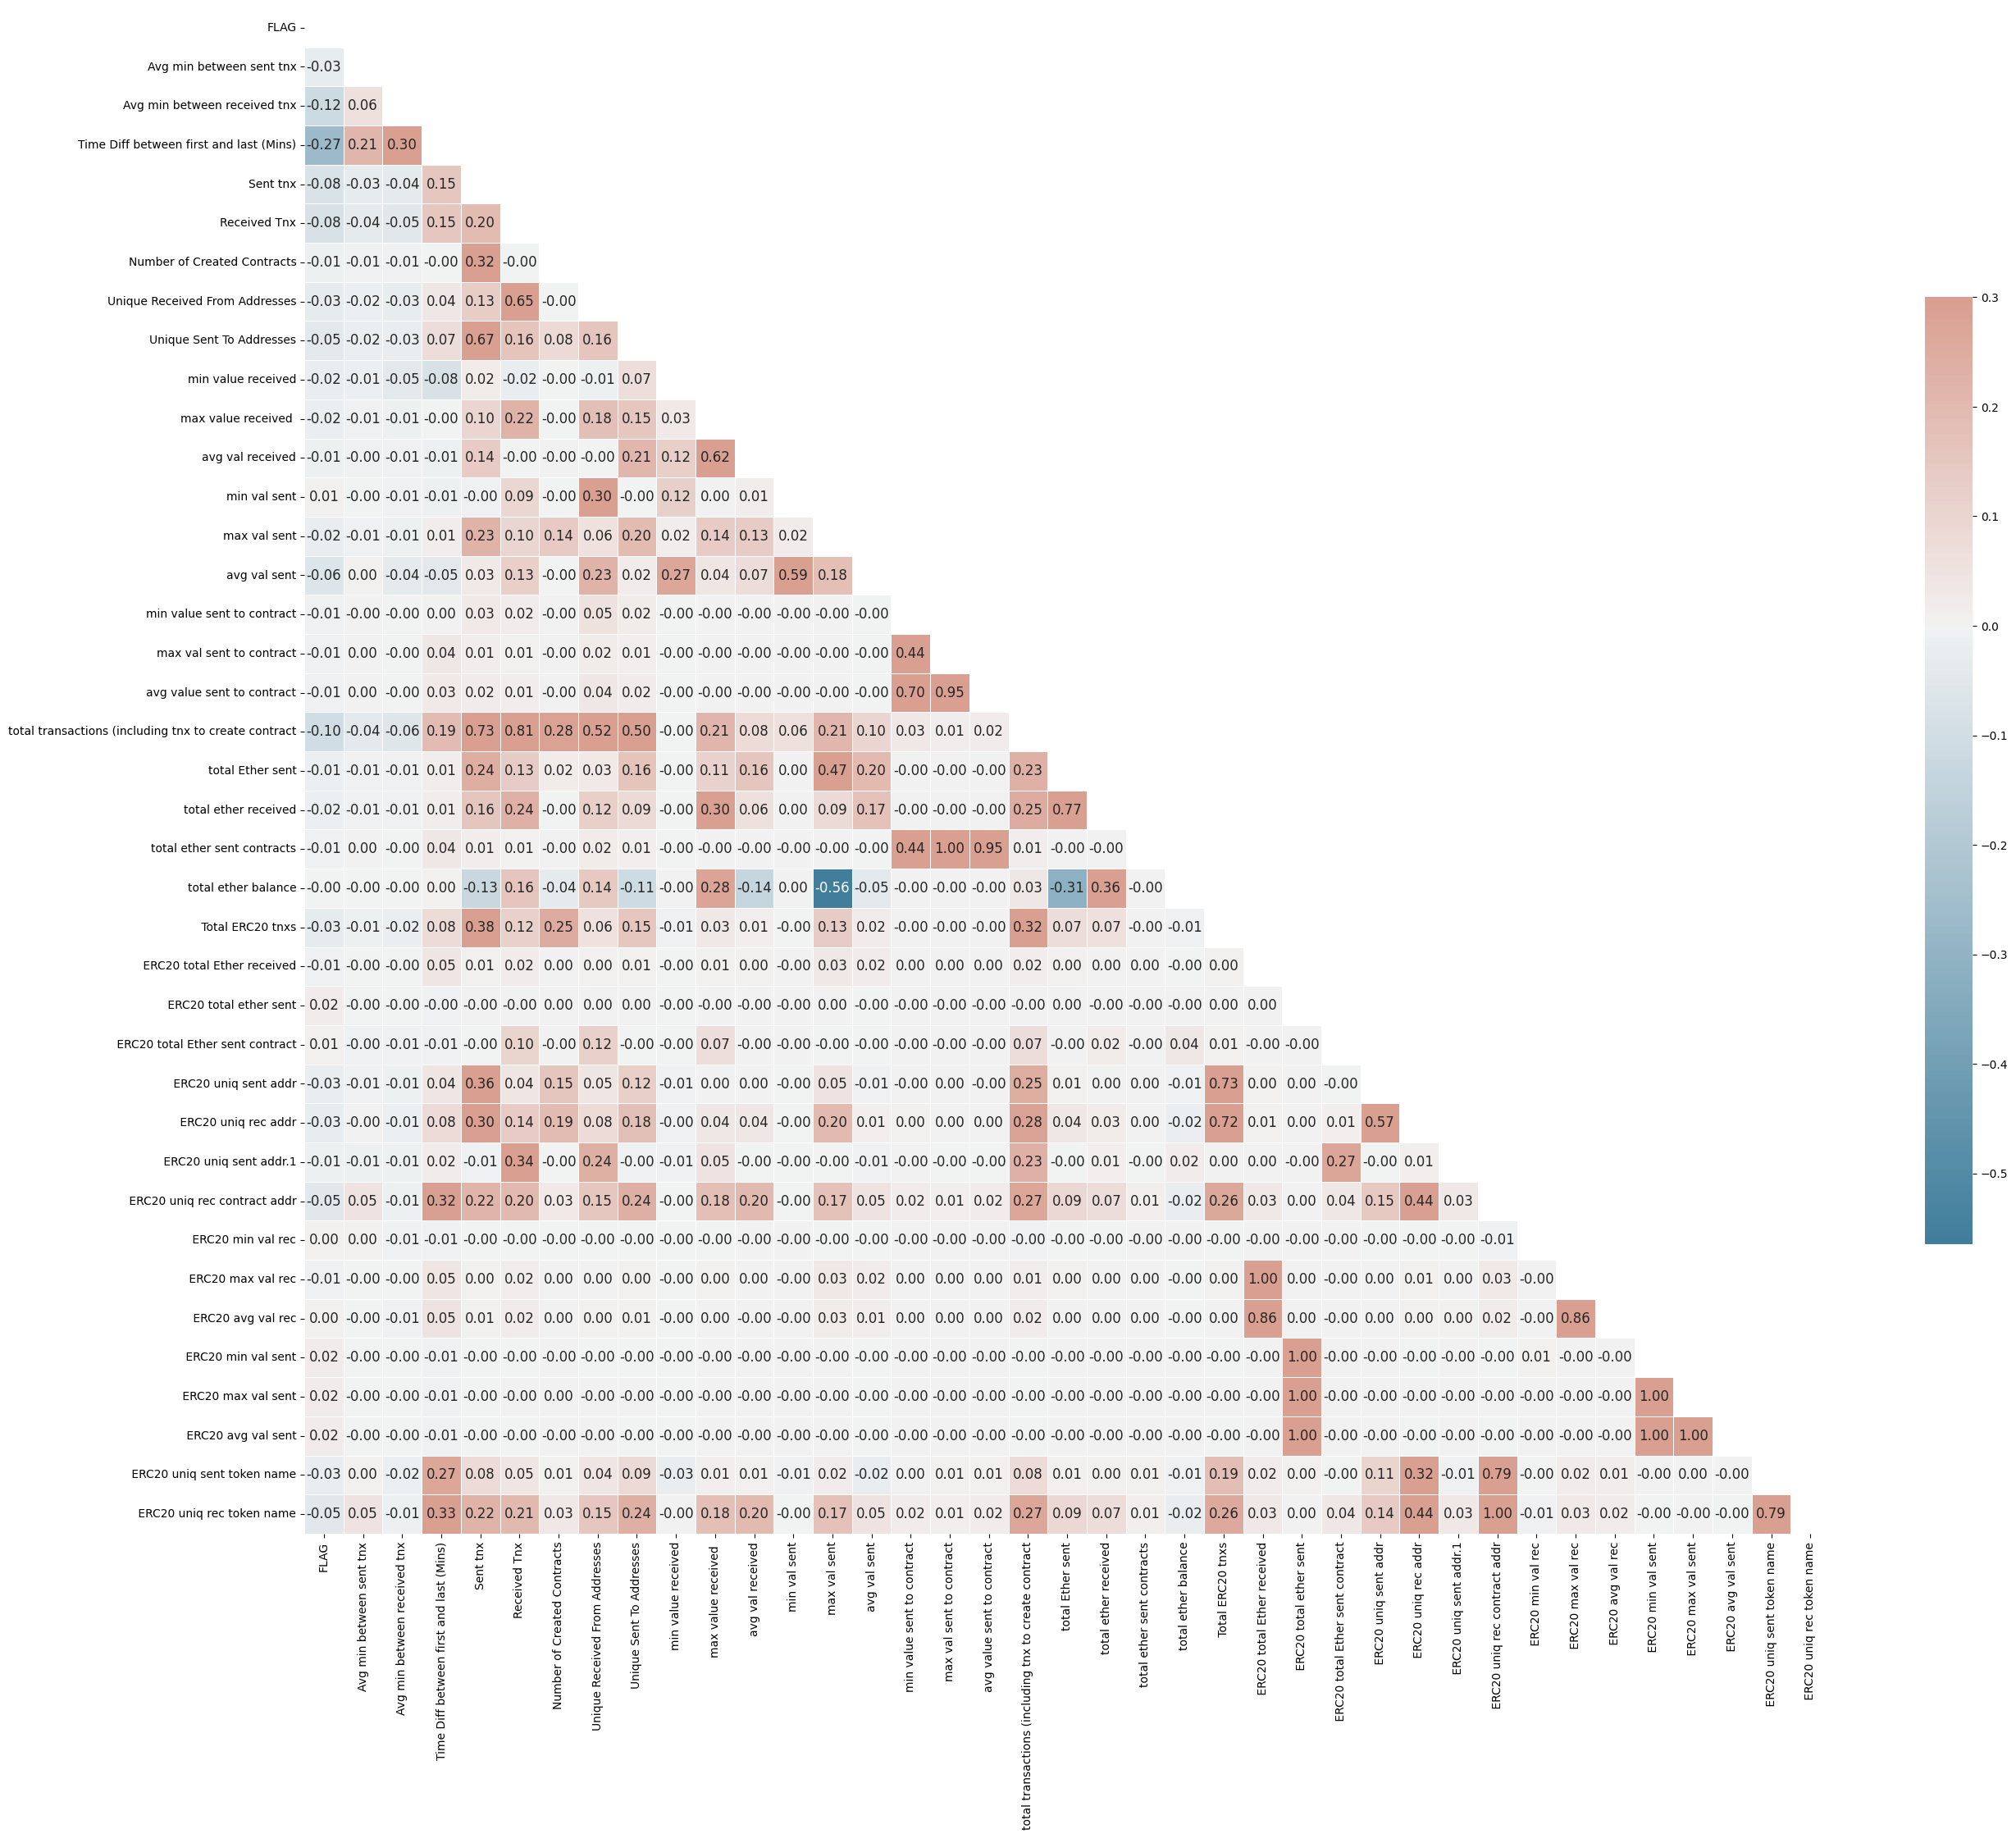

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(30, 30))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f", annot_kws={"size": 12})

plt.show()


In [20]:
soretd_corr=corr.sort_values(by=['FLAG'],key=abs)

In [21]:
soretd_corr

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
ERC20 avg val rec,0.003132,-0.002829,-0.005241,0.049160,0.009104,0.019382,0.002096,0.003741,0.005412,-0.002610,...,0.003207,0.021501,-0.000455,0.859766,1.000000,-0.000205,-0.000117,-0.000123,0.013764,0.022273
total ether balance,-0.003229,-0.001425,-0.002149,0.002955,-0.127211,0.158146,-0.037902,0.144949,-0.113428,-0.000233,...,0.018368,-0.023787,-0.000170,-0.001251,-0.000991,-0.000048,-0.000112,-0.000065,-0.005164,-0.023809
ERC20 min val rec,0.004434,0.004998,-0.007794,-0.008921,-0.003480,-0.004043,-0.000724,-0.001784,-0.002093,-0.000847,...,-0.001367,-0.005930,1.000000,-0.000311,-0.000455,0.006815,-0.000280,-0.000265,-0.002288,-0.006013
ERC20 max val rec,-0.005510,-0.002260,-0.003326,0.046278,0.004445,0.015522,0.000946,0.001691,0.003696,-0.001528,...,0.001051,0.027598,-0.000311,1.000000,0.859766,-0.000121,-0.000078,-0.000083,0.017746,0.028497
ERC20 total Ether received,-0.005711,-0.002339,-0.003430,0.046570,0.006840,0.016648,0.002099,0.002832,0.005809,-0.001580,...,0.001031,0.030039,-0.000322,0.999967,0.859823,-0.000125,-0.000047,-0.000057,0.018349,0.030934
min val sent,0.006626,-0.000789,-0.008761,-0.013107,-0.004846,0.093448,-0.000913,0.296240,-0.003166,0.117682,...,-0.001735,-0.003749,-0.000446,-0.000393,-0.000663,-0.000369,-0.000366,-0.000353,-0.006785,-0.003728
min value sent to contract,-0.007213,-0.000210,-0.003916,0.001734,0.029529,0.020645,-0.000261,0.053946,0.023183,-0.001820,...,-0.000678,0.018886,-0.000372,0.000541,0.000598,-0.000144,-0.000134,-0.000134,0.001533,0.019304
max val sent to contract,-0.007988,0.001044,-0.003230,0.036162,0.013263,0.008243,-0.000225,0.023258,0.010926,-0.002015,...,-0.000750,0.012325,-0.000412,0.000133,0.000085,-0.000160,-0.000155,-0.000151,0.005911,0.012685
total ether sent contracts,-0.007988,0.001044,-0.003230,0.036162,0.013263,0.008243,-0.000225,0.023258,0.010926,-0.002015,...,-0.000750,0.012325,-0.000412,0.000133,0.000085,-0.000160,-0.000155,-0.000151,0.005911,0.012685
ERC20 total Ether sent contract,0.008127,-0.004101,-0.005813,-0.007337,-0.002652,0.104939,-0.000334,0.116755,-0.001697,-0.002331,...,0.274658,0.037021,-0.000477,-0.000125,-0.000154,-0.000184,-0.000183,-0.000177,-0.002817,0.036892


In [22]:
# Removing Flag Label
feature_transaction_df = df.drop(columns = 'FLAG')

# Plotting Correlation Matrix to see understand which features are highly correlated
numeric_transaction_df = feature_transaction_df = df.drop(columns = 'FLAG').select_dtypes(include=np.number) #
corr_matrix = numeric_transaction_df.corr().round(2)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Finding correlations that are above 0.7
correlation_threshold = 0.7
reduced_corr_matrix = corr_matrix.mask(mask)
corr_matrix_unstacked = reduced_corr_matrix.unstack()
similar_features = corr_matrix_unstacked[abs(corr_matrix_unstacked) >= correlation_threshold].reset_index().rename(columns={'level_0': 'feature_1', 'level_1': 'feature_2', 0: 'Absolute Correlation'})
similar_features.sort_values(by="Absolute Correlation",ascending=False)

,feature_1,feature_2,Absolute Correlation
15,ERC20 uniq rec contract addr,ERC20 uniq rec token name,1.00
19,ERC20 max val sent,ERC20 avg val sent,1.00
4,max val sent to contract,total ether sent contracts,1.00
18,ERC20 min val sent,ERC20 avg val sent,1.00
17,ERC20 min val sent,ERC20 max val sent,1.00
9,ERC20 total Ether received,ERC20 max val rec,1.00
11,ERC20 total ether sent,ERC20 min val sent,1.00
12,ERC20 total ether sent,ERC20 max val sent,1.00
13,ERC20 total ether sent,ERC20 avg val sent,1.00
3,max val sent to contract,avg value sent to contract,0.95


In [23]:
drop = ['total transactions (including tnx to create contract',
        'total ether sent contracts',
        'max val sent to contract',
        ' ERC20 avg val rec',
        ' ERC20 avg val rec',
        ' ERC20 max val rec',
        ' ERC20 min val rec',
        ' ERC20 uniq rec contract addr',
        'max val sent',
        ' ERC20 avg val sent',
        ' ERC20 min val sent',
        ' ERC20 max val sent',
        ' Total ERC20 tnxs',
        'avg value sent to contract',
        'Unique Sent To Addresses',
        'Unique Received From Addresses',
        'total ether received',
        ' ERC20 uniq sent token name',
        'min value received',
        'min val sent',
        ' ERC20 uniq rec addr' ]
df.drop(drop, axis=1, inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9841 entries, 0 to 9840
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   FLAG                                     9841 non-null   int64  
 1   Avg min between sent tnx                 9841 non-null   float64
 2   Avg min between received tnx             9841 non-null   float64
 3   Time Diff between first and last (Mins)  9841 non-null   float64
 4   Sent tnx                                 9841 non-null   int64  
 5   Received Tnx                             9841 non-null   int64  
 6   Number of Created Contracts              9841 non-null   int64  
 7   max value received                       9841 non-null   float64
 8   avg val received                         9841 non-null   float64
 9   avg val sent                             9841 non-null   float64
 10  min value sent to contract               9841 non-nul

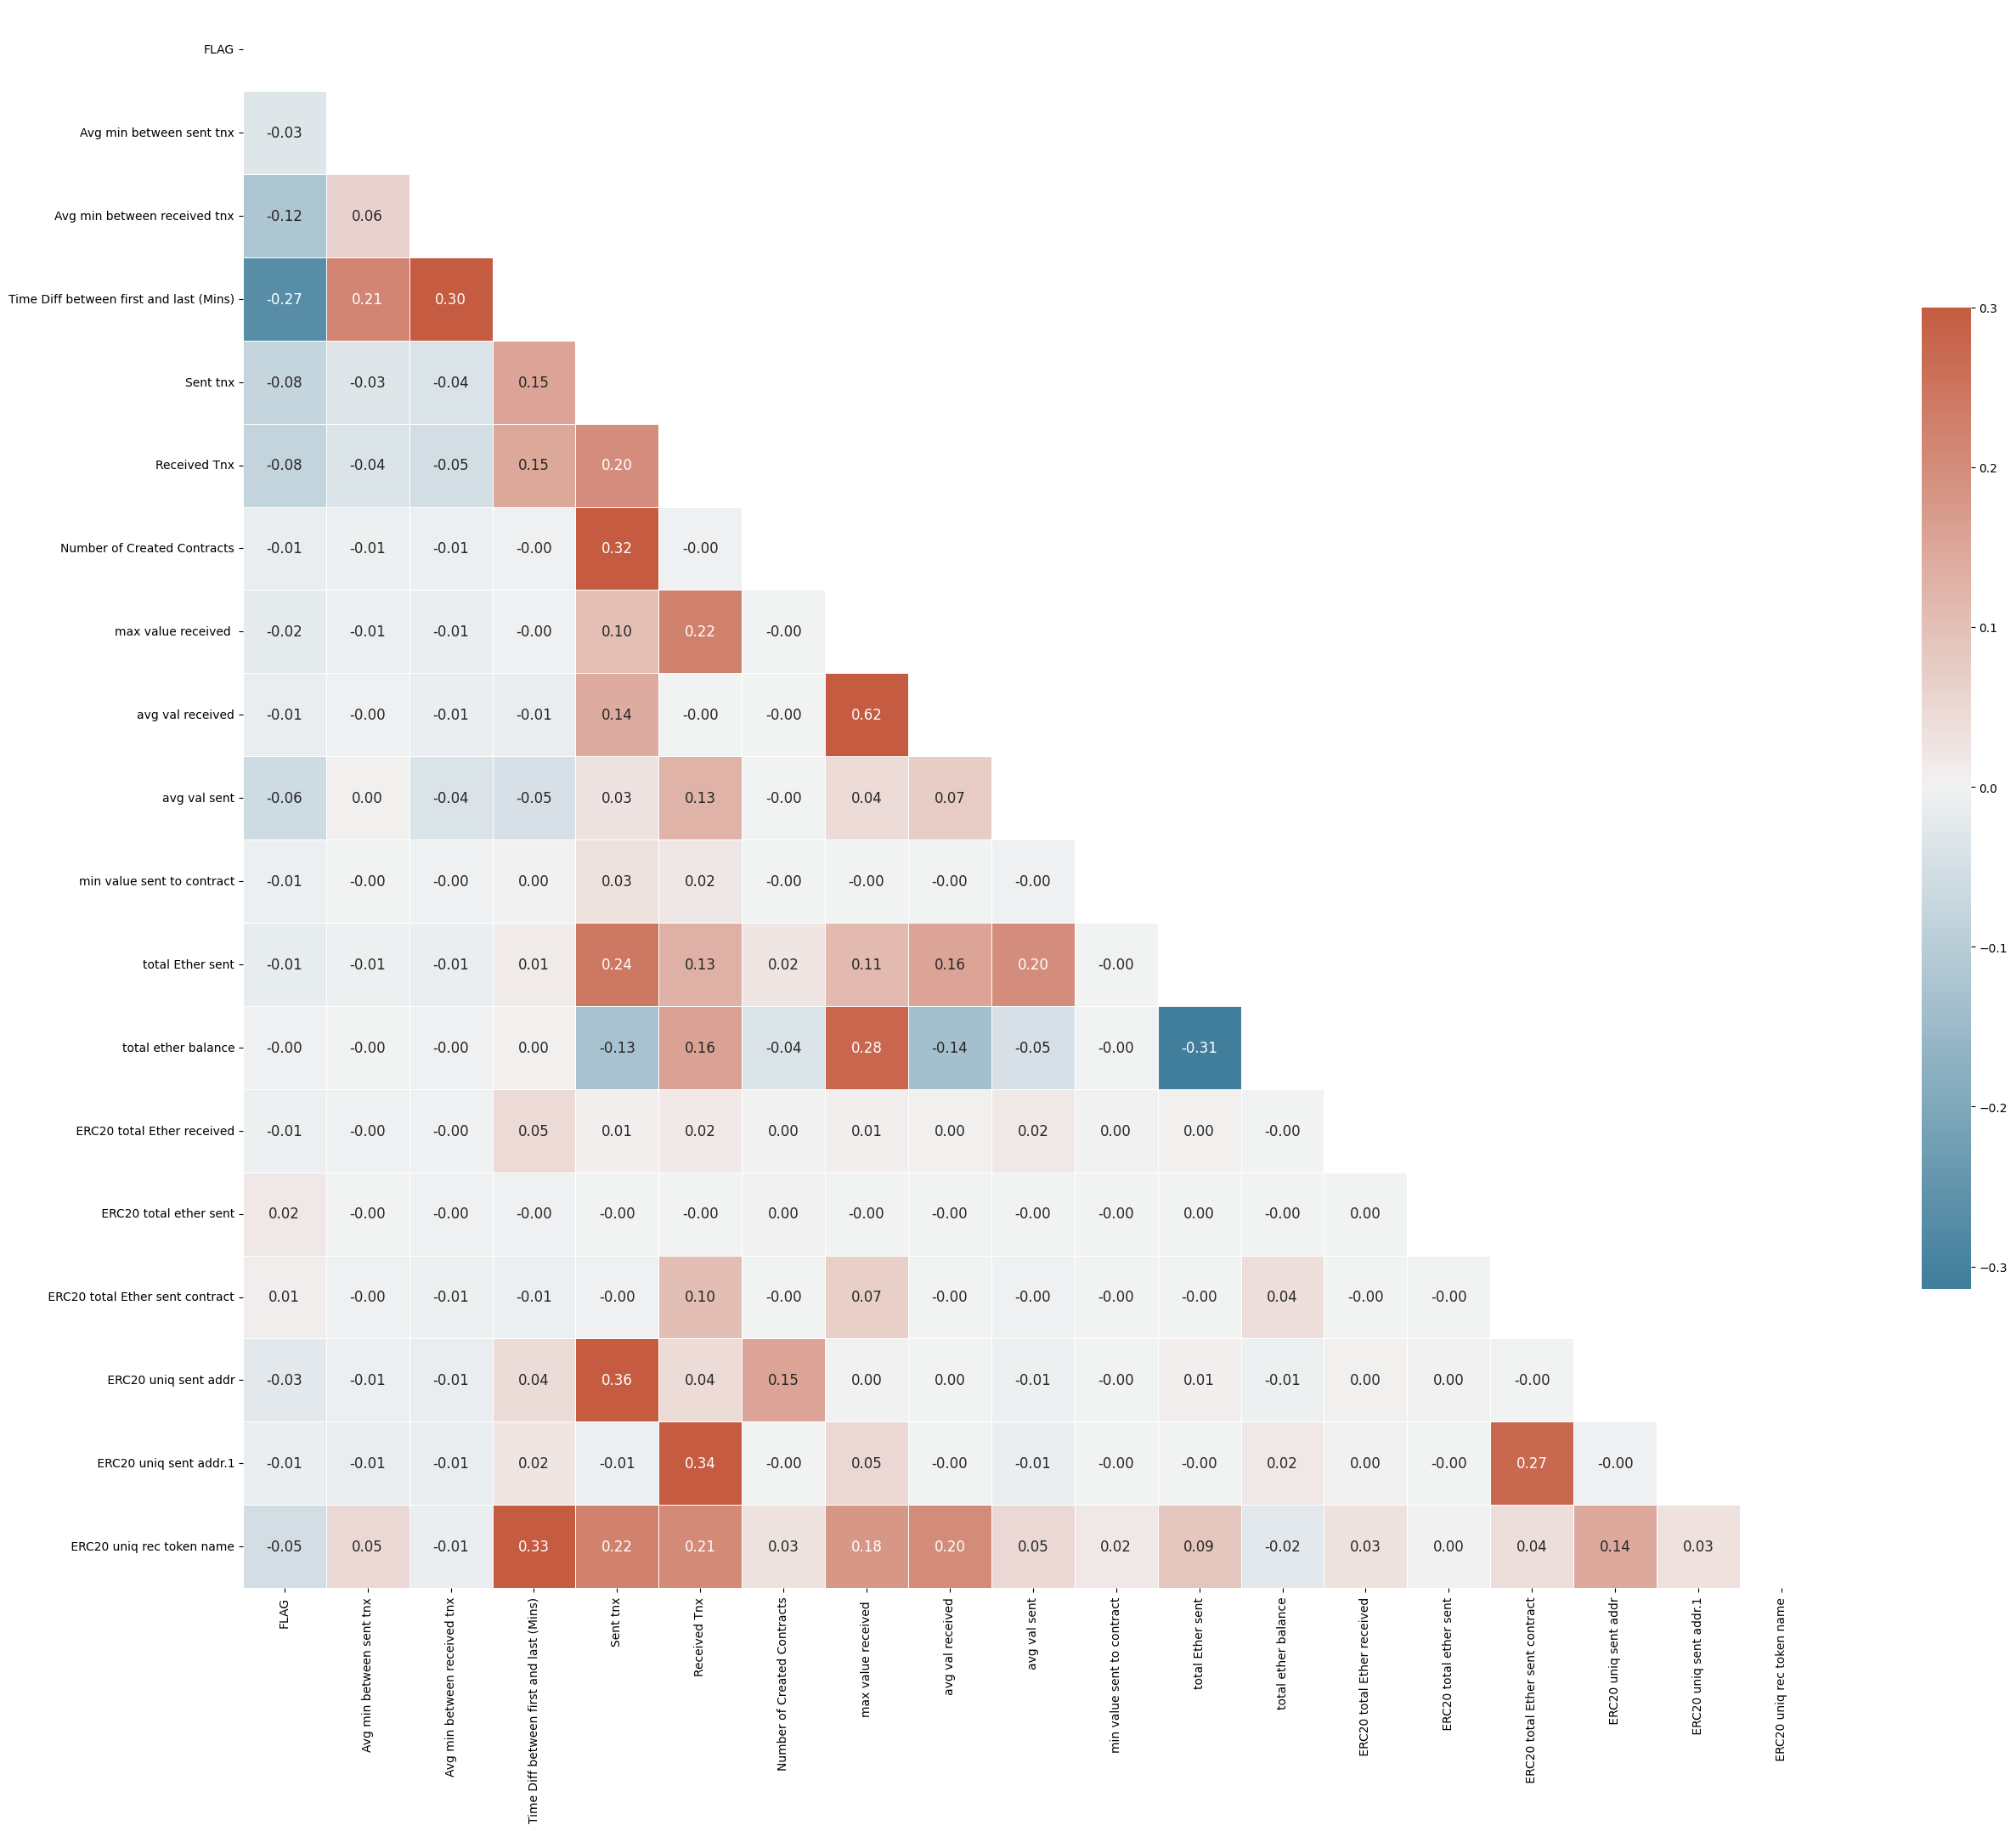

In [25]:

corr = df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(30, 30))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f", annot_kws={"size": 12})

plt.show()

In [26]:
columns = df.columns
columns

Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'max value received ',
       'avg val received', 'avg val sent', 'min value sent to contract',
       'total Ether sent', 'total ether balance',
       ' ERC20 total Ether received', ' ERC20 total ether sent',
       ' ERC20 total Ether sent contract', ' ERC20 uniq sent addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec token name'],
      dtype='object')

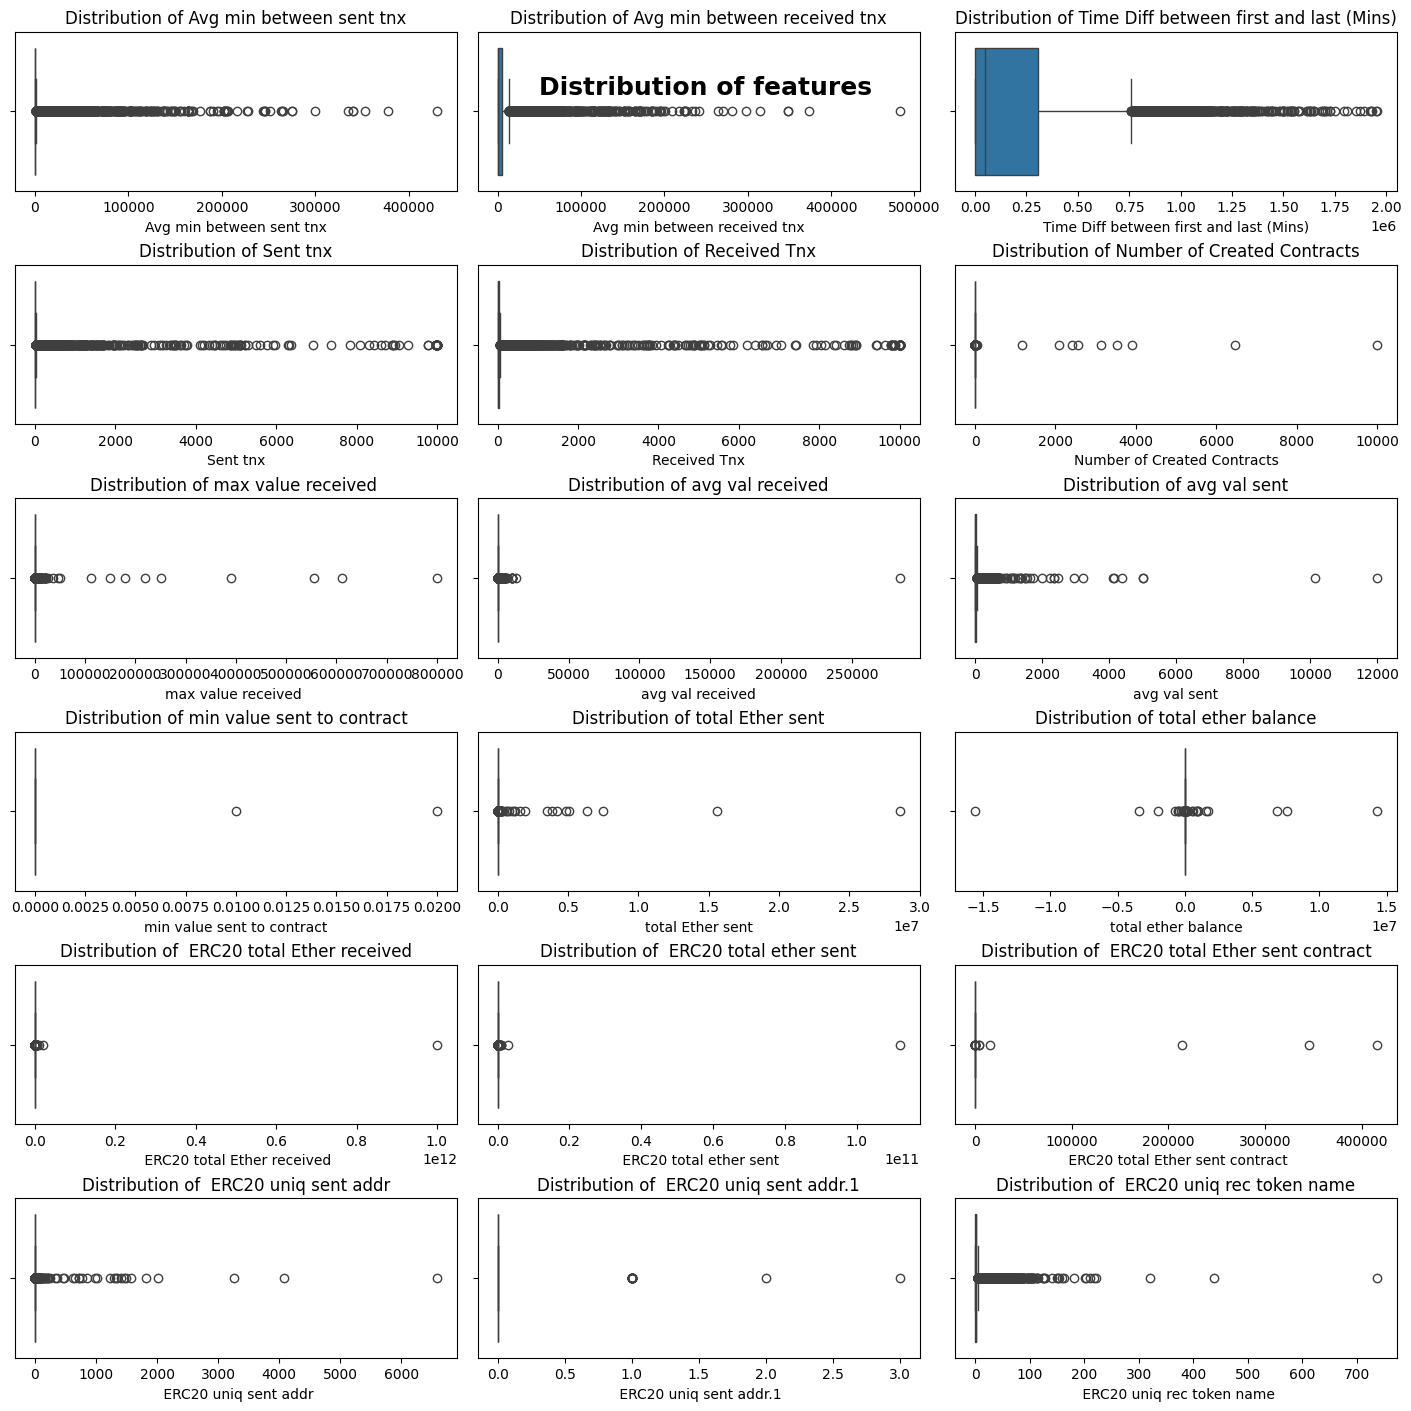

In [27]:
# Investigate the distribution of our features using boxplots
b=20

fig, axes = plt.subplots(6, 3, figsize=(14, 14), constrained_layout =True)
plt.subplots_adjust(wspace = 0.7, hspace=0.8)
plt.suptitle("Distribution of features",y=0.95, size=18, weight='bold')

ax = sns.boxplot(ax = axes[0,0], data=df, x=columns[1])
ax.set_title(f'Distribution of {columns[1]}')

ax1 = sns.boxplot(ax = axes[0,1], data=df, x=columns[2])
ax1.set_title(f'Distribution of {columns[2]}')

ax2 = sns.boxplot(ax = axes[0,2], data=df, x=columns[3])
ax2.set_title(f'Distribution of {columns[3]}')

ax3 = sns.boxplot(ax = axes[1,0], data=df, x=columns[4])
ax3.set_title(f'Distribution of {columns[4]}')

ax4 = sns.boxplot(ax = axes[1,1], data=df, x=columns[5])
ax4.set_title(f'Distribution of {columns[5]}')

ax5 = sns.boxplot(ax = axes[1,2], data=df, x=columns[6])
ax5.set_title(f'Distribution of {columns[6]}')

ax6 = sns.boxplot(ax = axes[2,0], data=df, x=columns[7])
ax6.set_title(f'Distribution of {columns[7]}')

ax7 = sns.boxplot(ax = axes[2,1], data=df, x=columns[8])
ax7.set_title(f'Distribution of {columns[8]}')

ax8 = sns.boxplot(ax = axes[2,2], data=df, x=columns[9])
ax8.set_title(f'Distribution of {columns[9]}')

ax9 = sns.boxplot(ax = axes[3,0], data=df, x=columns[10])
ax9.set_title(f'Distribution of {columns[10]}')

ax10 = sns.boxplot(ax = axes[3,1], data=df, x=columns[11])
ax10.set_title(f'Distribution of {columns[11]}')

ax11 = sns.boxplot(ax = axes[3,2], data=df, x=columns[12])
ax11.set_title(f'Distribution of {columns[12]}')

ax12 = sns.boxplot(ax = axes[4,0], data=df, x=columns[13])
ax12.set_title(f'Distribution of {columns[13]}')

ax13 = sns.boxplot(ax = axes[4,1], data=df, x=columns[14])
ax13.set_title(f'Distribution of {columns[14]}')

ax14 = sns.boxplot(ax = axes[4,2], data=df, x=columns[15])
ax14.set_title(f'Distribution of {columns[15]}')

ax15 = sns.boxplot(ax = axes[5,0], data=df, x=columns[16])
ax15.set_title(f'Distribution of {columns[16]}')

ax16 = sns.boxplot(ax = axes[5,1], data=df, x=columns[17])
ax16.set_title(f'Distribution of {columns[17]}')

ax17 = sns.boxplot(ax = axes[5,2], data=df, x=columns[18])
ax17.set_title(f'Distribution of {columns[18]}')

plt.show()

In [28]:
# Some features present a small distribution
for i in df.columns[1:]:
    if len(df[i].value_counts()) < 10:
        print(f'The column {i} has the following distribution: \n{df[i].value_counts()}')
        print('========================~==============')

The column min value sent to contract has the following distribution: 
min value sent to contract
0.00    9839
0.02       1
0.01       1
Name: count, dtype: int64
========================~==============
The column  ERC20 uniq sent addr.1 has the following distribution: 
 ERC20 uniq sent addr.1
0.0    9813
1.0      26
3.0       1
2.0       1
Name: count, dtype: int64
========================~==============


In [29]:
y = df.iloc[:, 0]
X = df.iloc[:, 1:]
print(X.shape, y.shape)

(9841, 18) (9841,)


In [30]:
# Split into training (80%) and testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7872, 18) (7872,)
(1969, 18) (1969,)


In [31]:
X_train

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,min value sent to contract,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq sent addr.1,ERC20 uniq rec token name
4886,4224.31,15322.04,1141794.73,119,42,0,125.017611,21.091836,8.420149,0.0,1001.997727,-116.140623,3.952977e+05,335200.1525,0.0,15.0,0.0,35.0
9098,0.00,0.00,0.00,0,0,0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000e-12,0.0000,0.0,0.0,0.0,1.0
1109,15.88,394.63,563075.85,1363,1372,0,27.000000,0.278498,0.277128,0.0,377.725350,4.373288,0.000000e+00,0.0000,0.0,0.0,0.0,0.0
4766,0.00,19859.78,39719.55,0,2,1,0.998990,0.499495,0.000000,0.0,0.000000,0.998990,0.000000e+00,0.0000,0.0,0.0,0.0,0.0
4686,158.22,0.33,317.10,2,2,0,54.838452,50.500000,50.499508,0.0,100.999016,0.000984,0.000000e+00,0.0000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9785,0.00,457.17,940.23,1,2,0,2.257062,1.678531,3.356037,0.0,3.356037,0.001025,1.000000e-12,0.0000,0.0,0.0,0.0,1.0
7763,1641.74,2103.12,327679.35,10,148,0,14.341000,1.429861,21.161505,0.0,211.615052,0.004326,2.095638e+03,0.0000,0.0,0.0,0.0,5.0
5218,0.00,0.00,64.67,1,1,0,0.174997,0.174997,0.172797,0.0,0.172797,0.002200,0.000000e+00,0.0000,0.0,0.0,0.0,0.0
1346,7470.96,8287.97,199029.10,10,15,0,2125.259250,146.984511,220.476327,0.0,2204.763269,0.004389,7.245763e+02,0.0000,0.0,0.0,0.0,4.0


In [32]:
sc = StandardScaler()
sc_train = sc.fit_transform(X_train)

In [33]:
sc_df = pd.DataFrame(sc_train, columns=X_train.columns)
sc_df


,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,min value sent to contract,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq sent addr.1,ERC20 uniq rec token name
0,-0.038167,0.310581,2.851119,0.001530,-0.133464,-0.025638,-0.031784,-0.130116,-0.170156,-0.015123,-0.026374,-0.008354,-0.051039,-0.011875,-0.019294,0.125987,-0.053812,1.868394
1,-0.238842,-0.339707,-0.675810,-0.153323,-0.176780,-0.025638,-0.043658,-0.183336,-0.209762,-0.015123,-0.028905,-0.007921,-0.052388,-0.012140,-0.019294,-0.058886,-0.053812,-0.217464
2,-0.238088,-0.322958,1.063494,1.620329,1.238207,-0.025638,-0.041094,-0.182633,-0.208458,-0.015123,-0.027951,-0.007905,-0.052388,-0.012140,-0.019294,-0.058886,-0.053812,-0.278813
3,-0.238842,0.503169,-0.553119,-0.153323,-0.174717,-0.018987,-0.043563,-0.182076,-0.209762,-0.015123,-0.028905,-0.007917,-0.052388,-0.012140,-0.019294,-0.058886,-0.053812,-0.278813
4,-0.231326,-0.339693,-0.674831,-0.150720,-0.174717,-0.025638,-0.038450,-0.055912,0.027769,-0.015123,-0.028650,-0.007921,-0.052388,-0.012140,-0.019294,-0.058886,-0.053812,-0.278813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7867,-0.238842,-0.320304,-0.672906,-0.152022,-0.174717,-0.025638,-0.043444,-0.179100,-0.193976,-0.015123,-0.028896,-0.007921,-0.052388,-0.012140,-0.019294,-0.058886,-0.053812,-0.217464
7868,-0.160852,-0.250448,0.336370,-0.140310,-0.024143,-0.025638,-0.042296,-0.179728,-0.110226,-0.015123,-0.028370,-0.007921,-0.052381,-0.012140,-0.019294,-0.058886,-0.053812,0.027931
7869,-0.238842,-0.339707,-0.675610,-0.152022,-0.175749,-0.025638,-0.043642,-0.182894,-0.208949,-0.015123,-0.028904,-0.007921,-0.052388,-0.012140,-0.019294,-0.058886,-0.053812,-0.278813
7870,0.116065,0.012046,-0.061022,-0.140310,-0.161310,-0.025638,0.158200,0.187543,0.827274,-0.015123,-0.023335,-0.007921,-0.052386,-0.012140,-0.019294,-0.058886,-0.053812,-0.033418


In [34]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_erc20_data = scaler.fit_transform(df)


pca_2 = PCA(n_components=2)
pca_2_features = pca_2.fit_transform(scaled_erc20_data)

In [35]:
model = TSNE(learning_rate=50)
tsne_features = model.fit_transform(pca_2_features)
tsne_features

array([[ -0.12936197,  39.910442  ],
       [ 15.373799  ,  62.42247   ],
       [-28.574026  ,  54.23515   ],
       ...,
       [ 32.21775   ,  42.356277  ],
       [ 32.942677  ,  -1.7229184 ],
       [ 46.111042  ,  51.038506  ]], dtype=float32)

In [36]:
tsne_features[1:4, :]

array([[ 15.373799,  62.42247 ],
       [-28.574026,  54.23515 ],
       [-33.119686,  31.846767]], dtype=float32)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style to white
sns.set_style("white")

# Assuming df is your DataFrame
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x='tsne_x', y='tsne_y', data=df, alpha=0.6, hue='FLAG', style='FLAG')
plt.show()


In [38]:
tsne_3d = TSNE(n_components=3, random_state=42)
tsne_features_3d = tsne_3d.fit_transform(df.drop('FLAG', axis=1))

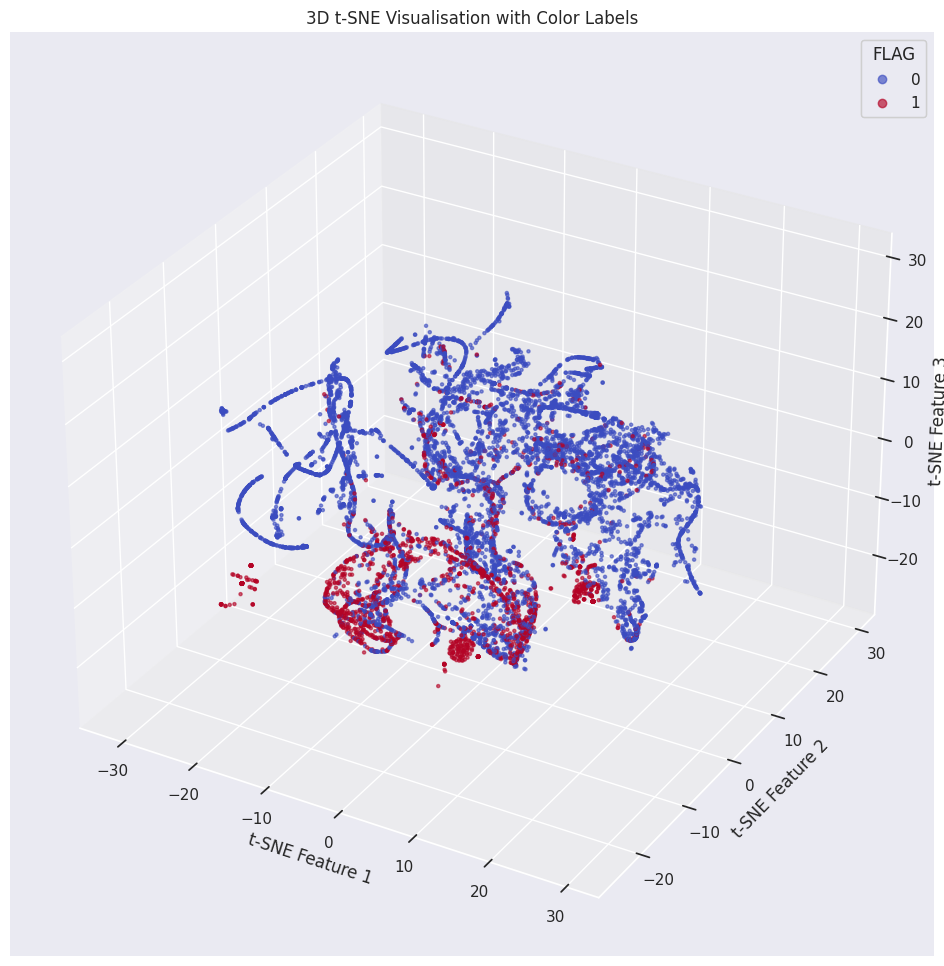

In [39]:

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')


scatter = ax.scatter(
    tsne_features_3d[:, 0], tsne_features_3d[:, 1], tsne_features_3d[:, 2],
    c=df['FLAG'], cmap='coolwarm', s=5, alpha=0.6
)


legend1 = ax.legend(*scatter.legend_elements(), loc="best", title="FLAG")
ax.add_artist(legend1)


ax.set_xlabel('t-SNE Feature 1')
ax.set_ylabel('t-SNE Feature 2')
ax.set_zlabel('t-SNE Feature 3')
plt.title('3D t-SNE Visualisation with Color Labels')


plt.show()


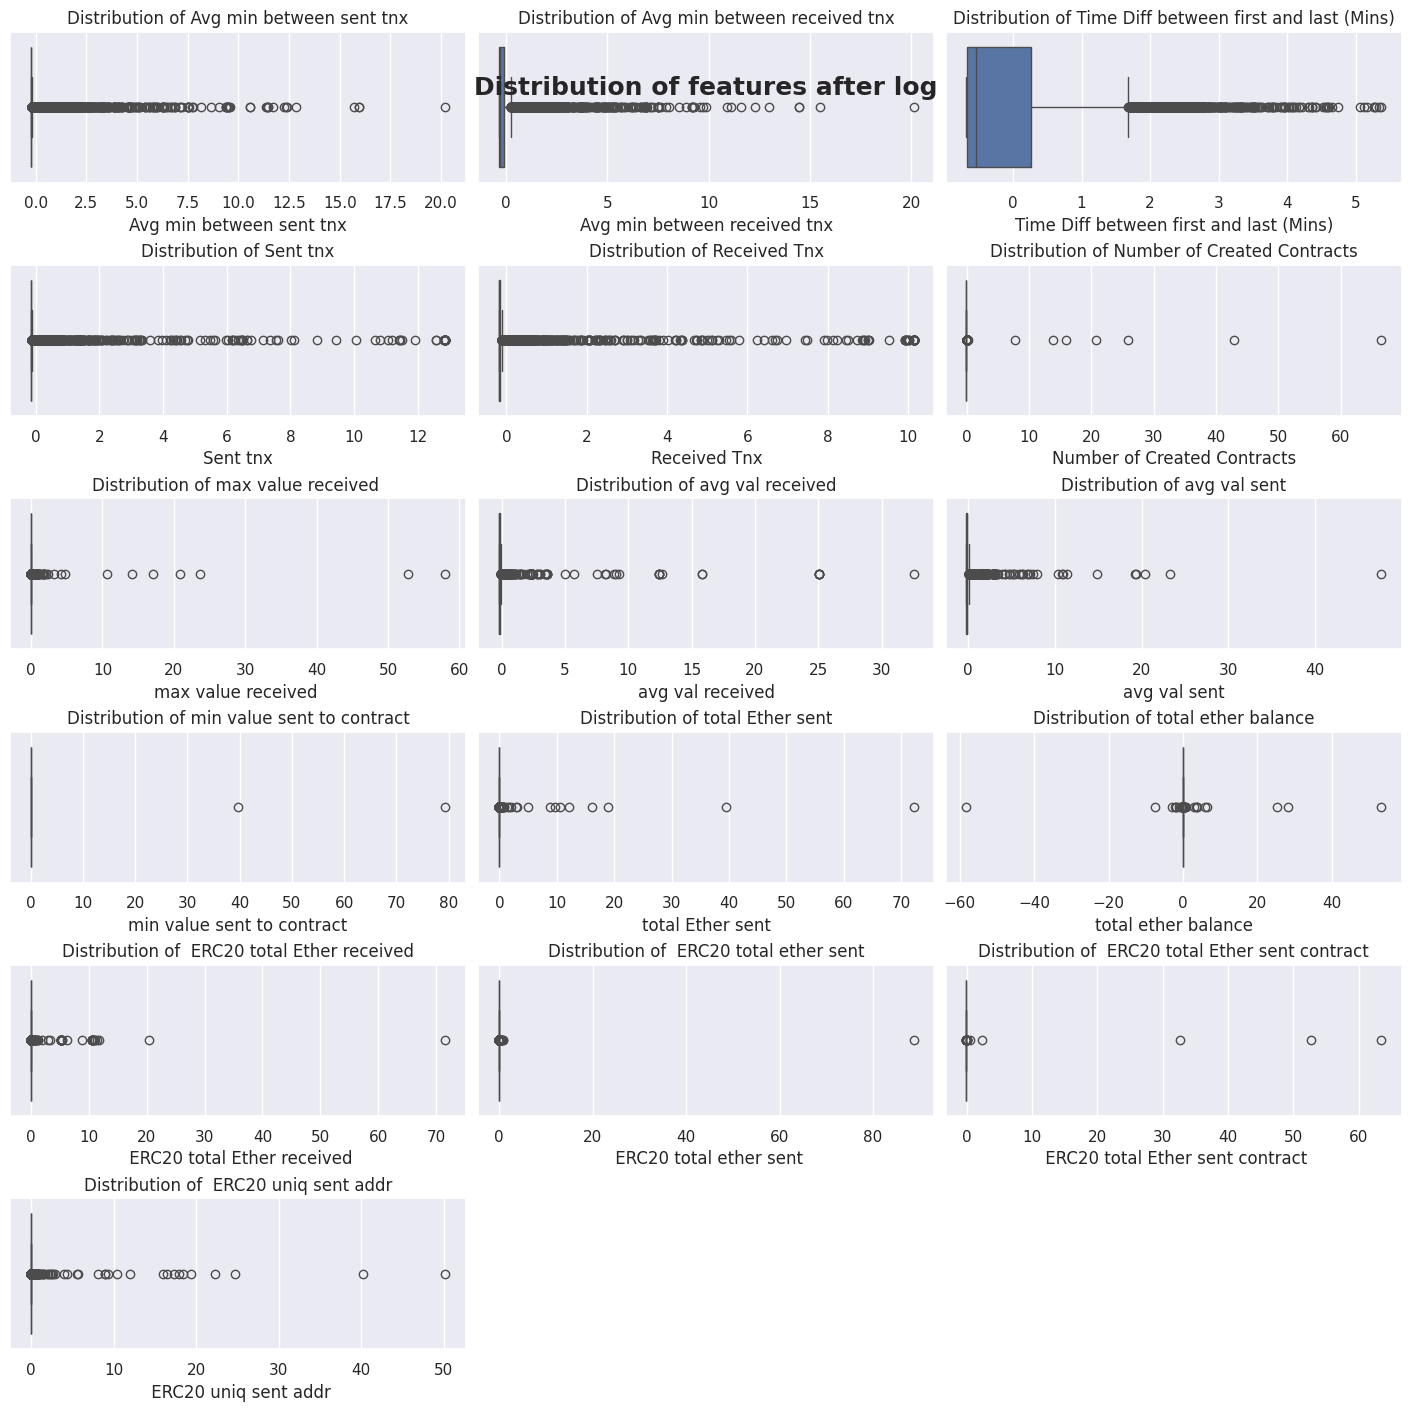

In [40]:
# Distribution of features after log transformation

b=20

fig, axes = plt.subplots(6, 3, figsize=(14, 14), constrained_layout =True)
plt.subplots_adjust(wspace = 0.7, hspace=0.8)
axes[-1, -1].axis('off') # hide axes
axes[-1, -2].axis('off') # hide axes
plt.suptitle("Distribution of features after log",y=0.95, family='Sherif', size=18, weight='bold')

ax = sns.boxplot(ax = axes[0,0], data=sc_df, x=sc_df.columns[0])
ax.set_title(f'Distribution of {sc_df.columns[0]}')

ax1 = sns.boxplot(ax = axes[0,1], data=sc_df, x=sc_df.columns[1])
ax1.set_title(f'Distribution of {sc_df.columns[1]}')

ax2 = sns.boxplot(ax = axes[0,2], data=sc_df, x=sc_df.columns[2])
ax2.set_title(f'Distribution of {sc_df.columns[2]}')

ax3 = sns.boxplot(ax = axes[1,0], data=sc_df, x=sc_df.columns[3])
ax3.set_title(f'Distribution of {sc_df.columns[3]}')

ax4 = sns.boxplot(ax = axes[1,1], data=sc_df, x=sc_df.columns[4])
ax4.set_title(f'Distribution of {sc_df.columns[4]}')

ax5 = sns.boxplot(ax = axes[1,2], data=sc_df, x=sc_df.columns[5])
ax5.set_title(f'Distribution of {sc_df.columns[5]}')

ax6 = sns.boxplot(ax = axes[2,0], data=sc_df, x=sc_df.columns[6])
ax6.set_title(f'Distribution of {sc_df.columns[6]}')

ax7 = sns.boxplot(ax = axes[2,1], data=sc_df, x=sc_df.columns[7])
ax7.set_title(f'Distribution of {sc_df.columns[7]}')

ax8 = sns.boxplot(ax = axes[2,2], data=sc_df, x=sc_df.columns[8])
ax8.set_title(f'Distribution of {sc_df.columns[8]}')

ax9 = sns.boxplot(ax = axes[3,0], data=sc_df, x=sc_df.columns[9])
ax9.set_title(f'Distribution of {sc_df.columns[9]}')

ax10 = sns.boxplot(ax = axes[3,1], data=sc_df, x=sc_df.columns[10])
ax10.set_title(f'Distribution of {sc_df.columns[10]}')

ax11 = sns.boxplot(ax = axes[3,2], data=sc_df, x=sc_df.columns[11])
ax11.set_title(f'Distribution of {sc_df.columns[11]}')

ax12 = sns.boxplot(ax = axes[4,0], data=sc_df, x=sc_df.columns[12])
ax12.set_title(f'Distribution of {sc_df.columns[12]}')

ax13 = sns.boxplot(ax = axes[4,1], data=sc_df, x=sc_df.columns[13])
ax13.set_title(f'Distribution of {sc_df.columns[13]}')

ax14 = sns.boxplot(ax = axes[4,2], data=sc_df, x=sc_df.columns[14])
ax14.set_title(f'Distribution of {sc_df.columns[14]}')

ax15 = sns.boxplot(ax = axes[5,0], data=sc_df, x=sc_df.columns[15])
ax15.set_title(f'Distribution of {sc_df.columns[15]}')

plt.show()

In [41]:
oversample = SMOTE()
print(f'Shape of the train#ing before SMOTE: {sc_train.shape, y_train.shape}')

Shape of the train#ing before SMOTE: ((7872, 18), (7872,))


In [42]:
x_tr_resample, y_tr_resample = oversample.fit_resample(sc_train, y_train)
print(f'Shape of the training after SMOTE: {x_tr_resample.shape, y_tr_resample.shape}')

Shape of the training after SMOTE: ((12230, 18), (12230,))


In [43]:
 #Target distribution before SMOTE
non_fraud = 0
fraud = 0

for i in y_train:
    if i == 0:
        non_fraud +=1
    else:
        fraud +=1

# Target distribution after SMOTE
no = 0
yes = 1

for j in y_tr_resample:
    if j == 0:
        no +=1
    else:
        yes +=1


print(f'BEFORE OVERSAMPLING \n \tNon-frauds: {non_fraud} \n \tFrauds: {fraud}')
print(f'AFTER OVERSAMPLING \n \tNon-frauds: {no} \n \tFrauds: {yes}')

BEFORE OVERSAMPLING 
 	Non-frauds: 6115 
 	Frauds: 1757
AFTER OVERSAMPLING 
 	Non-frauds: 6115 
 	Frauds: 6116


In [44]:
LR = LogisticRegression(random_state=42)
LR.fit(x_tr_resample, y_tr_resample)

# Transform test features
sc_test = sc.transform(X_test)

preds = LR.predict(sc_test)

In [45]:
print(y_test.shape)
y_test.value_counts()

(1969,)


FLAG
0    1547
1     422
Name: count, dtype: int64

In [46]:
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      0.54      0.68      1547
           1       0.34      0.87      0.49       422

    accuracy                           0.61      1969
   macro avg       0.64      0.70      0.59      1969
weighted avg       0.81      0.61      0.64      1969

[[833 714]
 [ 55 367]]


In [47]:
RF = RandomForestClassifier(random_state=42)
RF.fit(x_tr_resample, y_tr_resample)
preds_RF = RF.predict(sc_test)

print(classification_report(y_test, preds_RF))
print(confusion_matrix(y_test, preds_RF))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1547
           1       0.93      0.94      0.94       422

    accuracy                           0.97      1969
   macro avg       0.96      0.96      0.96      1969
weighted avg       0.97      0.97      0.97      1969

[[1517   30]
 [  24  398]]


In [48]:
xgb_c = xgb.XGBClassifier(random_state=42)
xgb_c.fit(x_tr_resample, y_tr_resample)
preds_xgb = xgb_c.predict(sc_test)

print(classification_report(y_test, preds_xgb))
print(confusion_matrix(y_test, preds_xgb))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1547
           1       0.94      0.95      0.95       422

    accuracy                           0.98      1969
   macro avg       0.96      0.97      0.97      1969
weighted avg       0.98      0.98      0.98      1969

[[1520   27]
 [  19  403]]


Epoch 1/100
306/306 [==============================] - 5s 10ms/step - loss: 0.5464 - accuracy: 0.7249 - val_loss: 0.6933 - val_accuracy: 0.7825
Epoch 2/100
306/306 [==============================] - 3s 11ms/step - loss: 0.4240 - accuracy: 0.8133 - val_loss: 0.4926 - val_accuracy: 0.8438
Epoch 3/100
306/306 [==============================] - 3s 8ms/step - loss: 0.3318 - accuracy: 0.8716 - val_loss: 0.4006 - val_accuracy: 0.8594
Epoch 4/100
306/306 [==============================] - 3s 8ms/step - loss: 0.2673 - accuracy: 0.9106 - val_loss: 0.2994 - val_accuracy: 0.9178
Epoch 5/100
306/306 [==============================] - 2s 7ms/step - loss: 0.2296 - accuracy: 0.9241 - val_loss: 0.2409 - val_accuracy: 0.9374
Epoch 6/100
306/306 [==============================] - 1s 4ms/step - loss: 0.2192 - accuracy: 0.9295 - val_loss: 0.2812 - val_accuracy: 0.9178
Epoch 7/100
306/306 [==============================] - 1s 4ms/step - loss: 0.2100 - accuracy: 0.9333 - val_loss: 0.2145 - val_accuracy: 0.94

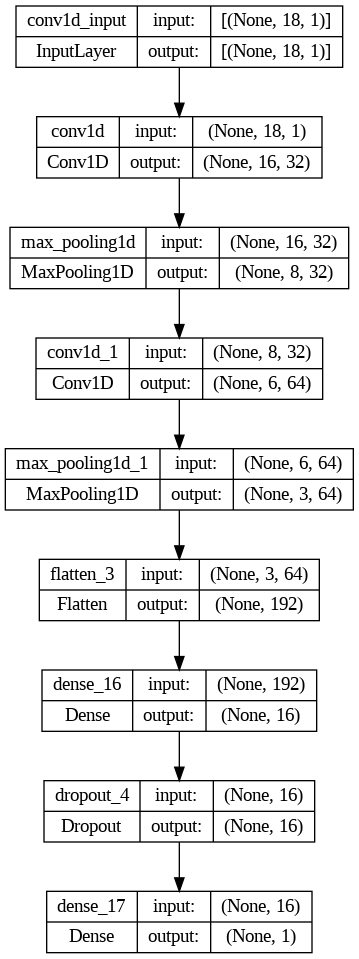

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model


model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(18, 1)))  # 1D Convolutional layer
model.add(MaxPooling1D(pool_size=2))  # Max pooling
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())  # Flatten the output for the dense layer
model.add(Dense(16, activation='relu'))  # Dense layer
model.add(Dropout(0.5))  # Dropout layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_tr_resample, y_tr_resample, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
preds_nn = (model.predict(sc_test) > 0.5).astype("int32")

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, preds_nn))
print(confusion_matrix(y_test, preds_nn))

plot_model(model, to_file='model_plot_cnn.png', show_shapes=True, show_layer_names=True)


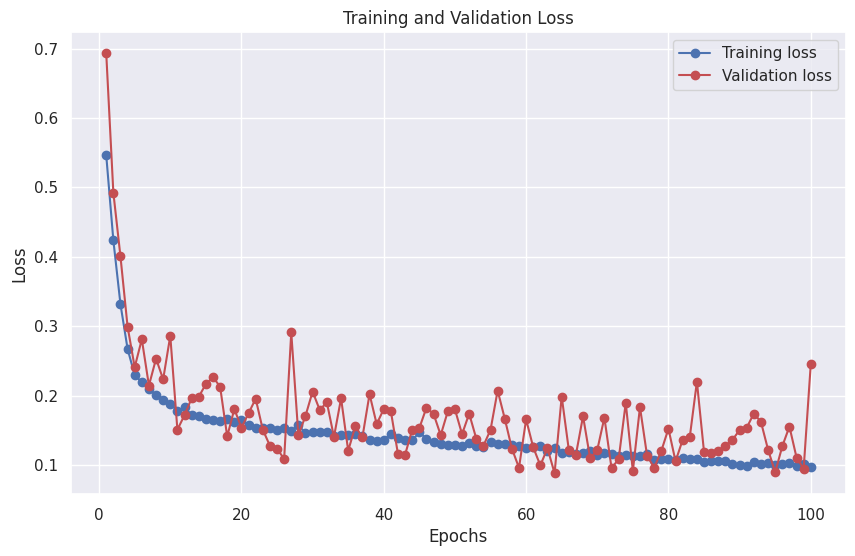

In [54]:
# Extracting the loss data
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# Plotting the loss curve
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

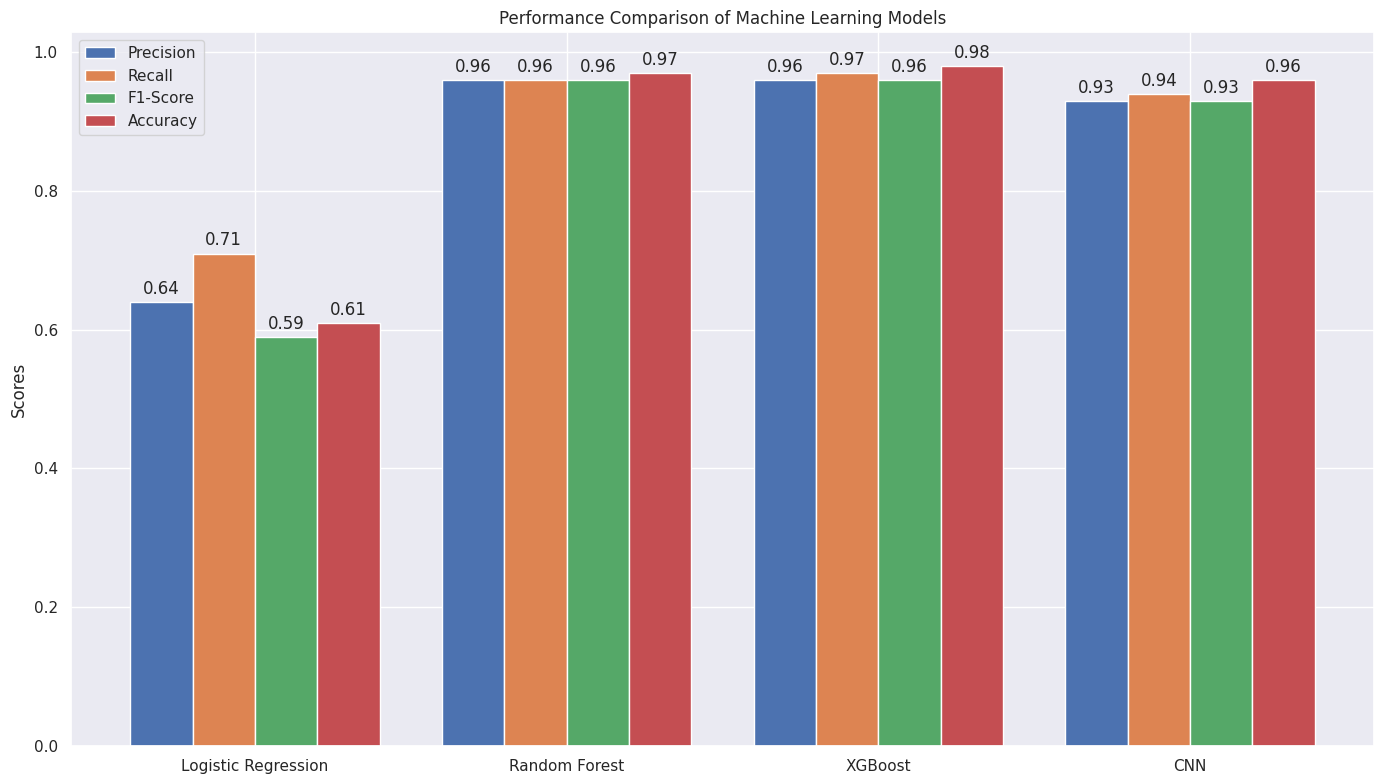

In [57]:
import matplotlib.pyplot as plt
import numpy as np


models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'CNN']


precision = np.array([0.64, 0.96, 0.96, 0.93])
recall = np.array([0.71, 0.96, 0.97, 0.94])
f1_score = np.array([0.59, 0.96, 0.96, 0.93])
accuracy = np.array([0.61, 0.97, 0.98, 0.96])


x = np.arange(len(models))
width = 0.20

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width*1.5, precision, width, label='Precision')
rects2 = ax.bar(x - width/2, recall, width, label='Recall')
rects3 = ax.bar(x + width/2, f1_score, width, label='F1-Score')
rects4 = ax.bar(x + width*1.5, accuracy, width, label='Accuracy')


ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of Machine Learning Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3)

fig.tight_layout()

plt.show()


In [ ]:
# Hyperparameter tuning using gridsearchCV
params_grid = {'learning_rate':[0.01, 0.1, 0.5, 0.75],
              'n_estimators':[50,100,200,250],
              'subsample':[0.2,0.5, 0.9, 1.2],
               'max_depth':[3,4,5,6],
               'colsample_bytree':[0.3,0.7, 1.2]}

grid = GridSearchCV(estimator=xgb_c, param_grid=params_grid, scoring='recall', cv = 10, verbose = 0)

grid.fit(x_tr_resample, y_tr_resample)
print(f'Best params found for XGBoost are: {grid.best_params_}')
print(f'Best recall obtained by the best params: {grid.best_score_}')

Best params found for XGBoost are: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 250, 'subsample': 0.5}
Best recall obtained by the best params: 0.988546313233422


In [ ]:
preds_best_xgb = grid.best_estimator_.predict(sc_test)
print(classification_report(y_test, preds_best_xgb))
print(confusion_matrix(y_test, preds_best_xgb))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1547
           1       0.94      0.95      0.95       422

    accuracy                           0.98      1969
   macro avg       0.97      0.97      0.97      1969
weighted avg       0.98      0.98      0.98      1969

[[1523   24]
 [  19  403]]


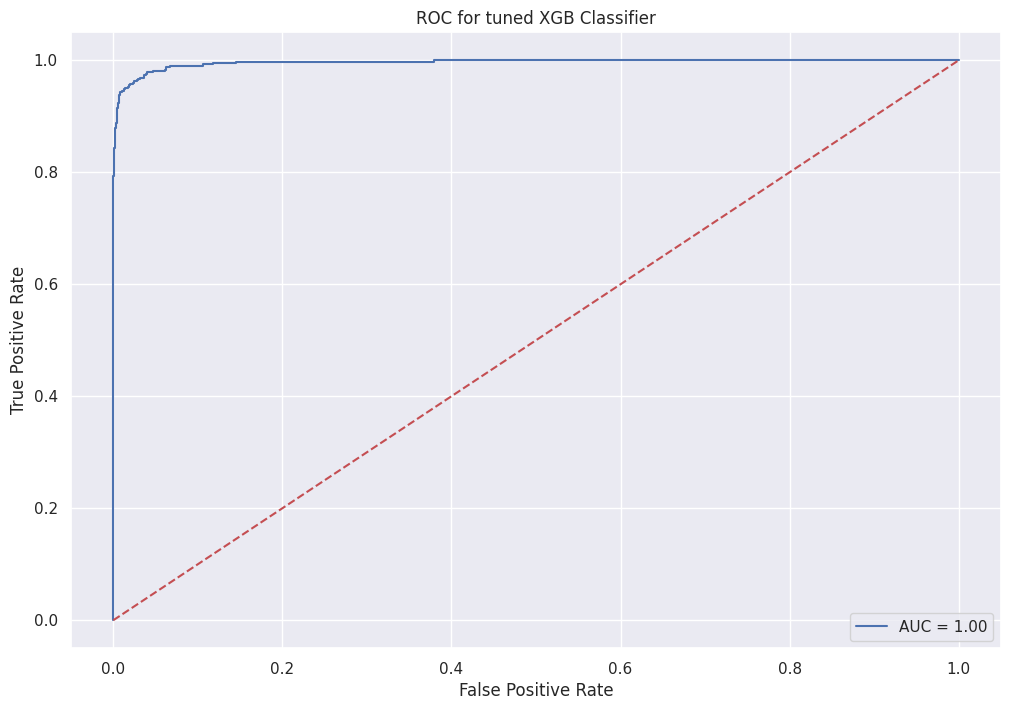

In [ ]:
# Plotting AUC for untuned XGB Classifier
probs = xgb_c.predict_proba(sc_test)
pred = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12,8))
plt.title('ROC for tuned XGB Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

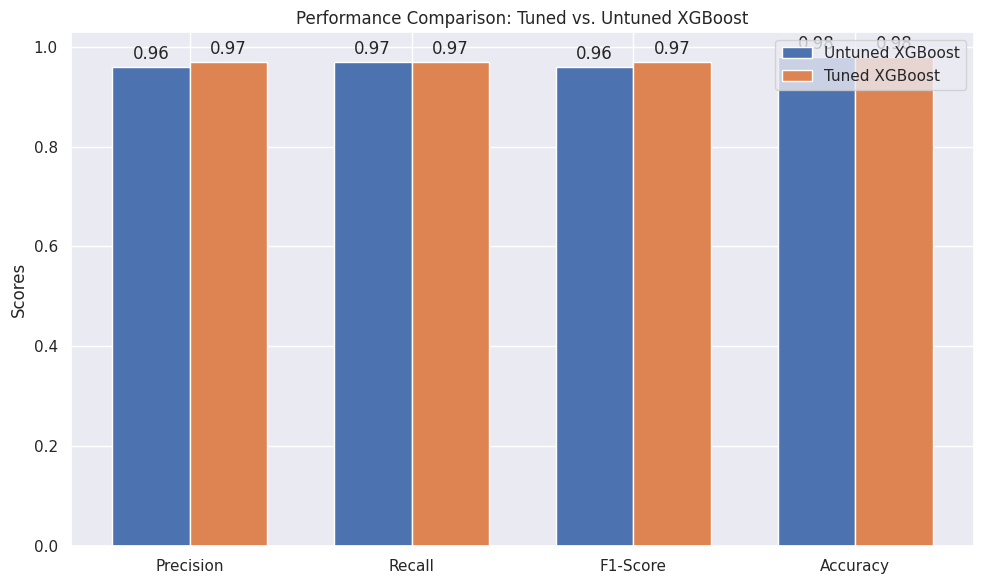

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
untuned_metrics = [0.96, 0.97, 0.96, 0.98]
tuned_metrics = [0.97, 0.97, 0.97, 0.98]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, untuned_metrics, width, label='Untuned XGBoost')
rects2 = ax.bar(x + width/2, tuned_metrics, width, label='Tuned XGBoost')


ax.set_ylabel('Scores')
ax.set_title('Performance Comparison: Tuned vs. Untuned XGBoost')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

fig.tight_layout()

plt.show()
